# Requirements
Before running this notebook, install dependencies with:
`pip install -r requirements.txt`

Note: XGBoost has some dependencies. So before running the above pip command, you can get these dependencies on MacOS using Homebrew with:

`brew install libomp`

Also, to pull down the datasets, you will need git LFS. On MacOS with Homebrew, you can do that with: 

`brew install git-lfs`

`git lfs install`

# Project Introduction: Overview of what Project Walksafe is - Javid Uddin

### Project Walksafe is focused on making Chicago's streets safer for pedestrians. Using a large dataset of traffic crashes in the city—nearly 930,000 total crashes, with over 37,000 involving pedestrians or cyclists—we wanted to explore when and where these accidents were happening and what may be causing them.

### We performed EDA to answer questions like "Are crashes more common at certain times of day? Do weather or lighting conditions play a role? Are there specific neighborhoods or intersections where accidents keep happening? Does (over)speeding play a role?"

### We used mapping tools and clustering algorithms to find high-risk areas, and ran machine learning models to see which factors seem to be most important in predicting pedestrian crashes.

# Project Changes Since Proposal - TODO

#### TODO

# Data: Preparing the Data and Showing Some Info on it - Samuel Haddad

#### In this section we are loading the crashes dataset and displaying some basic information about it. For more details about the data, please see the EDA sections as these contain lots of preprocessing / preparing, and provide maps, charts, and different kinds of plots to see how our datasets look!

In [32]:
import pandas as pd
import geopandas as gpd 
import numpy as np

import matplotlib.pyplot as plt
from shapely.geometry import Point

import altair as alt

In [33]:
traf_crash_df = pd.read_csv('traffic_crashes.csv')
traf_crash_df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,0.0,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258)
3,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569)
4,03a3b86d3b62c8948e25623db7ccf326fed99eaa297b59...,NaN,03/15/2025 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,0,7,3,41.836784,-87.723610,POINT (-87.723610276569 41.836784034697)


#### Listing all the columns in the traffic crashes dataset:

In [34]:
traf_crash_df.columns # showcasing all the features of the dataset

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

#### Listing all the types of crashes that are logged in the dataset:

In [35]:
traf_crash_df['FIRST_CRASH_TYPE'].unique() #  showcasing all the crash categories in the dataset

array(['ANGLE', 'FIXED OBJECT', 'REAR TO SIDE', 'TURNING',
       'PARKED MOTOR VEHICLE', 'PEDALCYCLIST', 'REAR TO FRONT',
       'SIDESWIPE OPPOSITE DIRECTION', 'REAR END',
       'SIDESWIPE SAME DIRECTION', 'HEAD ON', 'OTHER NONCOLLISION',
       'OTHER OBJECT', 'PEDESTRIAN', 'REAR TO REAR', 'ANIMAL',
       'OVERTURNED', 'TRAIN'], dtype=object)

In [36]:
# ~ 40,000 accidents that were pedestrian related incidents
traf_crash_df[(traf_crash_df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (traf_crash_df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')].head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
6,088061d9b7e5ab5b1353517ebefcadca065c20de8ca860...,N,03/15/2025 02:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PEDALCYCLIST,FOUR WAY,...,0.0,0.0,2.0,0.0,14,7,3,41.871778,-87.625789,POINT (-87.625789124419 41.871778332743)
53,2f3c202a917ab73f0de69b2f2bb0e95807e0afd7db8704...,NaN,03/15/2025 02:15:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDALCYCLIST,UNKNOWN,...,0.0,0.0,2.0,0.0,14,7,3,41.880565,-87.649361,POINT (-87.649361418191 41.880565045499)
65,57feb475a9f4253d7cb02b1168dbdb9aed4895e29faf0c...,NaN,11/04/2024 02:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,...,1.0,0.0,1.0,0.0,14,2,11,41.891621,-87.624254,POINT (-87.624253929022 41.891621161011)
116,542a4b3001422e80e685d2486fa17924bb374f380dc45e...,NaN,03/15/2025 11:51:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,11,7,3,41.917698,-87.682372,POINT (-87.682371991359 41.917698146237)
135,441a53d130fc1d01d7aaab8a0762e522464b9e421ec9d2...,NaN,09/22/2023 03:38:00 PM,5,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,PARKING LOT,...,0.0,0.0,1.0,0.0,15,6,9,41.864521,-87.639304,POINT (-87.639304099636 41.864521193744)


In [37]:
# Create the dataset into geo dataframe using latitude and longitude columns
geometry = [Point(xy) for xy in zip(traf_crash_df['LONGITUDE'], traf_crash_df['LATITUDE'])]
crash_gdf = gpd.GeoDataFrame(traf_crash_df, geometry=geometry, crs=4326)
crash_gdf.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511),POINT (-87.69731 41.79374)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493),POINT (-87.65674 41.81607)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258),POINT (-87.5773 41.75897)
3,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569),POINT (-87.70128 41.87833)
4,03a3b86d3b62c8948e25623db7ccf326fed99eaa297b59...,NaN,03/15/2025 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1.0,0.0,0,7,3,41.836784,-87.723610,POINT (-87.723610276569 41.836784034697),POINT (-87.72361 41.83678)


In [38]:
# filter the geo df to only use pedestrian related incidents
crash_gdf = crash_gdf[(crash_gdf['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_gdf['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]
crash_gdf.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
6,088061d9b7e5ab5b1353517ebefcadca065c20de8ca860...,N,03/15/2025 02:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PEDALCYCLIST,FOUR WAY,...,0.0,2.0,0.0,14,7,3,41.871778,-87.625789,POINT (-87.625789124419 41.871778332743),POINT (-87.62579 41.87178)
53,2f3c202a917ab73f0de69b2f2bb0e95807e0afd7db8704...,NaN,03/15/2025 02:15:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDALCYCLIST,UNKNOWN,...,0.0,2.0,0.0,14,7,3,41.880565,-87.649361,POINT (-87.649361418191 41.880565045499),POINT (-87.64936 41.88057)
65,57feb475a9f4253d7cb02b1168dbdb9aed4895e29faf0c...,NaN,11/04/2024 02:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,...,0.0,1.0,0.0,14,2,11,41.891621,-87.624254,POINT (-87.624253929022 41.891621161011),POINT (-87.62425 41.89162)
116,542a4b3001422e80e685d2486fa17924bb374f380dc45e...,NaN,03/15/2025 11:51:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,0.0,1.0,0.0,11,7,3,41.917698,-87.682372,POINT (-87.682371991359 41.917698146237),POINT (-87.68237 41.9177)
135,441a53d130fc1d01d7aaab8a0762e522464b9e421ec9d2...,NaN,09/22/2023 03:38:00 PM,5,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,PARKING LOT,...,0.0,1.0,0.0,15,6,9,41.864521,-87.639304,POINT (-87.639304099636 41.864521193744),POINT (-87.6393 41.86452)


In [39]:
# Read and display the chicago neighborhood geojson file
chicago_gdf = gpd.read_file('chicago.geojson')
chicago_gdf

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."
...,...,...,...,...,...
56,57,155285532.005,53406.9156168,60623,"MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ..."
57,58,211114779.439,58701.3253749,60629,"MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ..."
58,59,211696050.967,58466.1602979,60620,"MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ..."
59,60,125424284.172,52377.8545408,60637,"MULTIPOLYGON (((-87.57691 41.79511, -87.577 41..."


In [40]:
# Joining the crashes dataset with the chicago neighborhood geojson file
chi_crashes_gdf = gpd.sjoin(crash_gdf, chicago_gdf, predicate='within')

# EDA: Interactive Map Displaying & Exploring Pedestrian Related Accidents in Chicago - Alaa Musa 

#### TODO: Explain what the map is displaying and why it matters / why its helpful. Then, document in detail how to run the python script so that there is no confusion or question for the TAs in terms of how to see and run the map you made. Include in this documentation pointers to line numbers if changes to paths are needed, as well as the commands to run it, such as python3 script_name or python script_name (or whatever the command is to run it). Also include any pip install package_name commands that are needed for imports. 

#### Update: I uploaded all the datasets so I changed the file to load 'traffic_crashes.csv' and it works. So from the above, please still explain what the map is displaying and why it matters / why its helpful. Then, explain that to use the map you need to run the python file (python 418dataBas.py), and then open the generated html file inside a browser window. Also note that users must run 'pip install folium' as well. 

# EDA: Dot Density Map of Pedestrian Related Accidents in Chicago - Samuel Haddad

### The below dot density map showcases the spatial distribution of pedestrian related incidents in the city of Chicago. Due to the fact that the dataset is large (~930k crashes and ~37k pedestrian related ones), we took a sample of this to make the plot a bit more readable and display where the most dense areas were in terms of pedestrian crashes.

Text(0.5, 1.0, 'Pedestrian Related Accidents in Chicago')

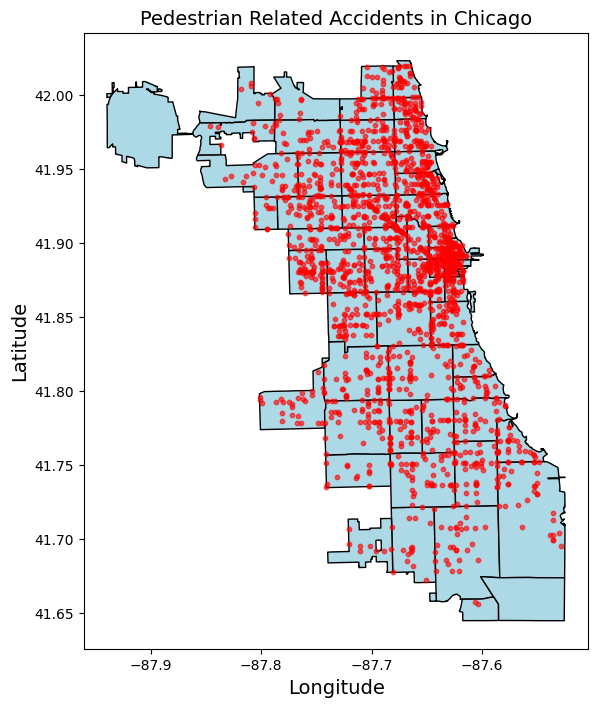

In [ ]:
# Dot Desnity Map of Pedestrian Related Accidents in Chicago
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Chicago neighborhoods
chicago_gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the green roof location onto the map
chi_crashes_gdf.sample(2000).plot(ax=ax, color='red', alpha=0.6, markersize=10)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title("Pedestrian Related Accidents in Chicago", fontsize=14)

# EDA: Chloropeth Map of Pedestrian Related Accidents per Neighberhood - Samuel Haddad

### The below chloropeth map showcases the spatial distribution of pedestrian related incidents per neighborhood in Chicago. This map allows us to see where the most pedestrian crashes are happening so we know which neighborhoods we should pinpoint and focus on when trying to address and reduce pedestrian related traffic incidents. 

<Axes: title={'center': 'Pedestrian Related Accidents per Neighborhood'}, xlabel='Longitude', ylabel='Latitude'>

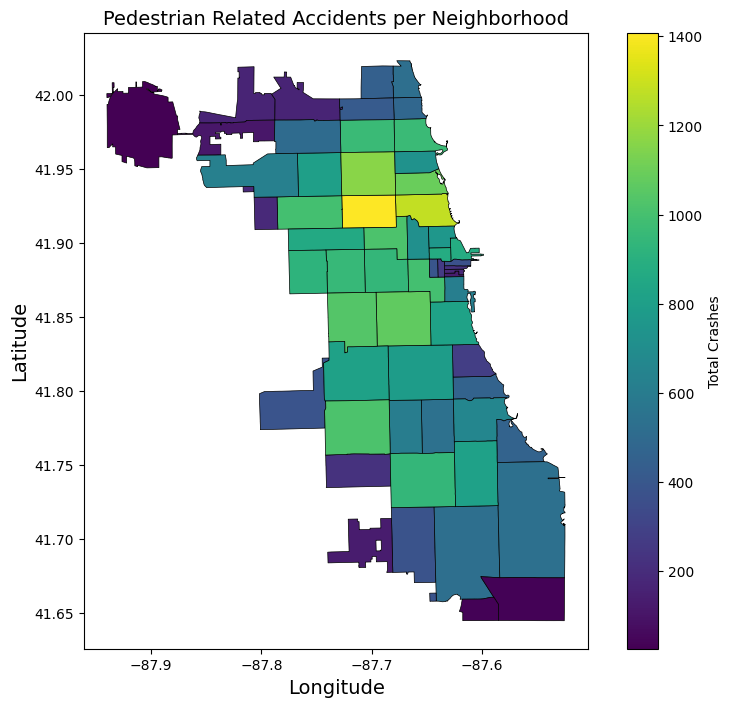

In [ ]:
# Chloropeth Map of Pedestrian Related Accidents Per Neighborhood in Chicago

# Create a new dataframe with the pedestrian accidents per neighborhood and 
# merge it with the chicago neighborhood geojson file
total_crashes_df = chi_crashes_gdf
total_crashes_df = total_crashes_df.groupby('zip').size().reset_index(name='count')

other_chi = chicago_gdf
merged = other_chi.merge(total_crashes_df, on='zip')

# plot chloropeth map of crash totals in each neighborhood
neighborhood_crashes_map = merged.plot('count', cmap='viridis', legend=True,
                 legend_kwds={'label': "Total Crashes",
    'orientation': "vertical"}, figsize=(10, 8), edgecolor='black', linewidth=0.5)
neighborhood_crashes_map.set_xlabel('Longitude', fontsize=14)
neighborhood_crashes_map.set_ylabel('Latitude', fontsize=14)
neighborhood_crashes_map.set_title("Pedestrian Related Accidents per Neighborhood", fontsize=14)
neighborhood_crashes_map

# EDA: Exploring the percentage breakdown of the Traffic Crash Dataset based on the Crash Types - Ameer Mustafa

### The Traffic Crash Dataset contains thousands of rows related to accidents. To better understand the distribution of the dataset, we decided to filter the dataset based on Crash Types. We printed the percentage breakdown based on unique categories and visualized the dataset using a pie chart. We discovered that pedestrian-related accidents fall into two main categories; Pedestrian and Pedalcyclist. These two categories combined amount to roughly 4% of the total database with a length of slightly over 35,000 rows. 

In [ ]:
import pandas as pd
import altair as alt


# Read in the dataset
df = pd.read_csv('traffic_crashes.csv')

# Display the length of the dataset
print("Dataset length: " , len(df))

# Create a dataframe for pedestrian crashes only
pedestrian_df = df[df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN']

# Print the length of the pedestrian dataframe
print("Pedestrian dataset length: " , len(pedestrian_df))

# Create a dataframe for pedalcyclist crashes only
pedalcyclist_df = df[df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST']

# Print the length of the pedalcyclist dataframe
print("Pedalcyclist dataset length: " , len(pedalcyclist_df))

# Identify the types of crashes that involve pedestrains based on the category breakdown and creating a new dataframe
pedestrain_involved_crashes = df[df['FIRST_CRASH_TYPE'].isin(['PEDESTRIAN', 'PEDALCYCLIST'])]

# Print the length of the pedestrian involved crashes dataframe and percentage 
print("Pedestrian involved crashes dataset length: " , len(pedestrain_involved_crashes))
print("Percentage of pedestrian involved crashes: " , len(pedestrain_involved_crashes) / len(df) * 100)

# Count each crash type and calculate percentage
crash_type_percentage_breakdown = df['FIRST_CRASH_TYPE'].value_counts(normalize=True) * 100

# Print results in a coincise format
for crash_type, percentage in crash_type_percentage_breakdown.items():
    print(f"{crash_type}: {percentage:.2f}%")

# Create a Dataframe from the crash type percentage breadkdown
data = pd.DataFrame(list(crash_type_percentage_breakdown.items()), columns=['Crash_Type', 'Percentage'])

# Create a pie chart using Altair
chart = alt.Chart(data).mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="Percentage", type="quantitative"), # Set the encodings to the percentage
    color=alt.Color(field="Crash_Type", type="nominal", scale=alt.Scale(scheme='category20')), # Set the color scheme 
    tooltip=[alt.Tooltip("Crash_Type:N"), alt.Tooltip("Percentage:Q", format=".2f")]  # Round percentage to 2 decimal places when hovering 
).properties(
    title="Percentage Breakdown of First Crash Types" # Title of the chart
)

# Display the chart
chart.show()

![Visual1](visuals/visualization_1.png)


Dataset length:  932083
Pedestrian dataset length:  22212
Pedalcyclist dataset length:  14630
Pedestrian involved crashes dataset length:  36842
Percentage of pedestrian involved crashes:  3.952652285257858
PARKED MOTOR VEHICLE: 23.14%
REAR END: 22.02%
SIDESWIPE SAME DIRECTION: 15.38%
TURNING: 14.42%
ANGLE: 10.90%
FIXED OBJECT: 4.64%
PEDESTRIAN: 2.38%
PEDALCYCLIST: 1.57%
SIDESWIPE OPPOSITE DIRECTION: 1.38%
REAR TO FRONT: 1.05%
OTHER OBJECT: 1.00%
HEAD ON: 0.85%
REAR TO SIDE: 0.62%
OTHER NONCOLLISION: 0.30%
REAR TO REAR: 0.22%
ANIMAL: 0.07%
OVERTURNED: 0.06%
TRAIN: 0.01%


alt.Chart(...)

# EDA: Loading & Cleaning Data - Javid Uddin

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def load_data():
    # Load crashes data with proper datetime parsing
    crashes = pd.read_csv("traffic_crashes.csv")
    crashes.columns = crashes.columns.str.strip()
    crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    
    # Load speed camera data
    cameras = pd.read_csv("speed_camera_violations.csv", parse_dates=['VIOLATION DATE'])
    cameras.columns = cameras.columns.str.strip()
    
    # Load traffic data
    traffic = pd.read_csv("chicago_traffic_tracker.csv", parse_dates=[' LAST_UPDATED'])
    traffic.columns = traffic.columns.str.strip()
    
    return crashes, cameras, traffic

def clean_data(crashes, cameras, traffic):
    # Clean crashes data
    crashes = crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])
    crashes['POSTED_SPEED_LIMIT'] = pd.to_numeric(crashes['POSTED_SPEED_LIMIT'], errors='coerce')
    
    # Clean camera data
    cameras = cameras.dropna(subset=['LATITUDE', 'LONGITUDE'])
    cameras['VIOLATIONS'] = pd.to_numeric(cameras['VIOLATIONS'], errors='coerce')
    
    # Clean traffic data
    traffic = traffic[traffic['CURRENT_SPEED'] > 0]  # Remove invalid speed records
    
    return crashes, cameras, traffic


crashes, cameras, traffic = load_data()
crashes, cameras, traffic = clean_data(crashes, cameras, traffic)


# EDA: Exploring Pedestrian Crashes Over Time (Hourly, Daily, Monthly) - Javid Uddin

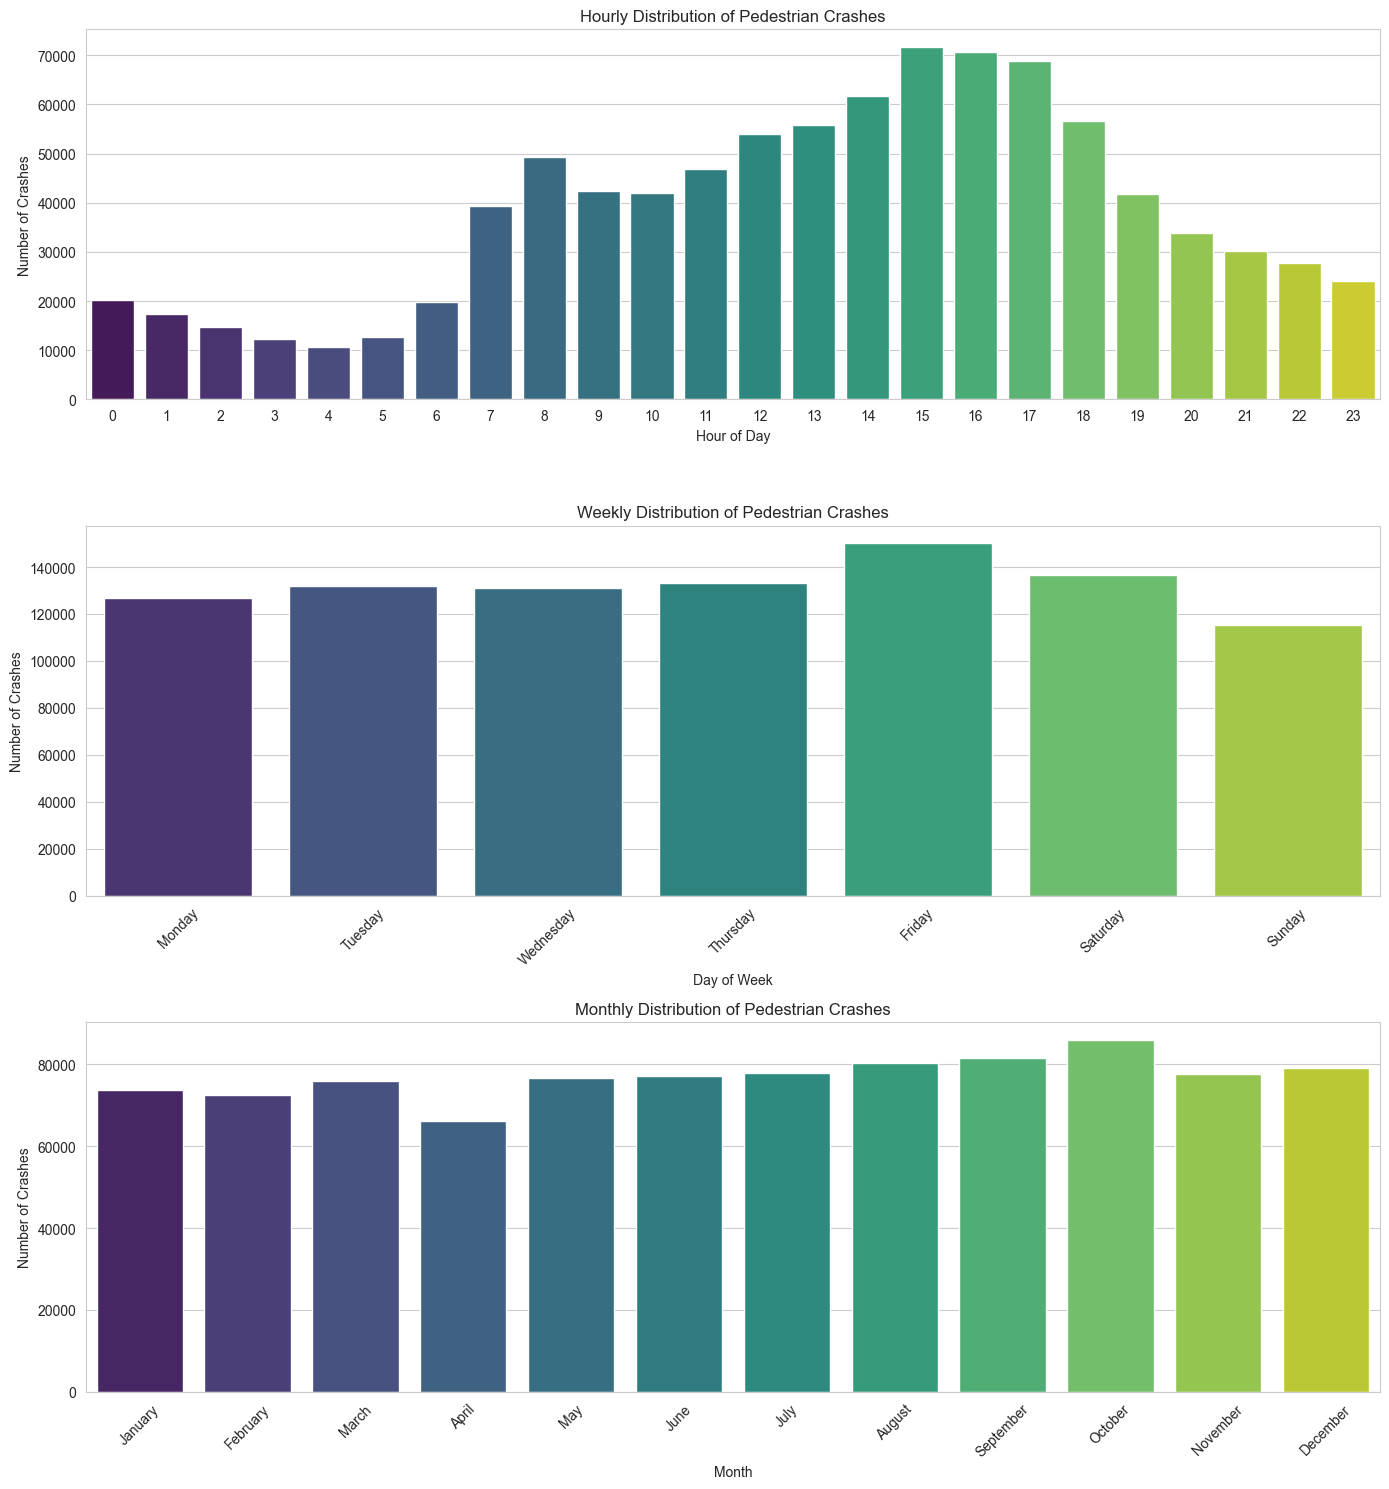

Crash Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 924583 entries, 0 to 931445
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                924583 non-null  object        
 1   CRASH_DATE_EST_I               68036 non-null   object        
 2   CRASH_DATE                     924583 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             924583 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         924583 non-null  object        
 5   DEVICE_CONDITION               924583 non-null  object        
 6   WEATHER_CONDITION              924583 non-null  object        
 7   LIGHTING_CONDITION             924583 non-null  object        
 8   FIRST_CRASH_TYPE               924583 non-null  object        
 9   TRAFFICWAY_TYPE                924583 non-null  object        
 10  LANE_CNT                       198123 non-null  floa

In [3]:
def plot_time_trends(crashes):
    """Plot time-based patterns in crash data"""
    fig, axes = plt.subplots(3, 1, figsize=(14, 15))
    
    # Hourly distribution
    crashes['CRASH_HOUR'] = crashes['CRASH_DATE'].dt.hour
    sns.countplot(data=crashes, x='CRASH_HOUR', ax=axes[0], palette='viridis')
    axes[0].set_title('Hourly Distribution of Pedestrian Crashes')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Number of Crashes')
    
    # Daily distribution
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    crashes['CRASH_DAY'] = crashes['CRASH_DATE'].dt.day_name()
    sns.countplot(data=crashes, x='CRASH_DAY', order=day_order, ax=axes[1], palette='viridis')
    axes[1].set_title('Weekly Distribution of Pedestrian Crashes')
    axes[1].set_xlabel('Day of Week')
    axes[1].set_ylabel('Number of Crashes')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Monthly distribution
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    crashes['CRASH_MONTH'] = crashes['CRASH_DATE'].dt.month_name()
    sns.countplot(data=crashes, x='CRASH_MONTH', order=month_order, ax=axes[2], palette='viridis')
    axes[2].set_title('Monthly Distribution of Pedestrian Crashes')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Number of Crashes')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_time_trends(crashes)

# crash data
print("Crash Data Overview:")
print(crashes.info())
print("\nCrash Data Description (Numerical Features):")
print(crashes.describe())

print("\nMost common injury types:")
print(crashes['MOST_SEVERE_INJURY'].value_counts())

print("\nTop 10 crash causes:")
print(crashes['FIRST_CRASH_TYPE'].value_counts().head(10))

print("\nWeather conditions during crashes:")
print(crashes['WEATHER_CONDITION'].value_counts())

print("\nLighting conditions during crashes:")
print(crashes['LIGHTING_CONDITION'].value_counts())

# EDA: Analyzing Speed Limits with Crash Severity - Javid Uddin

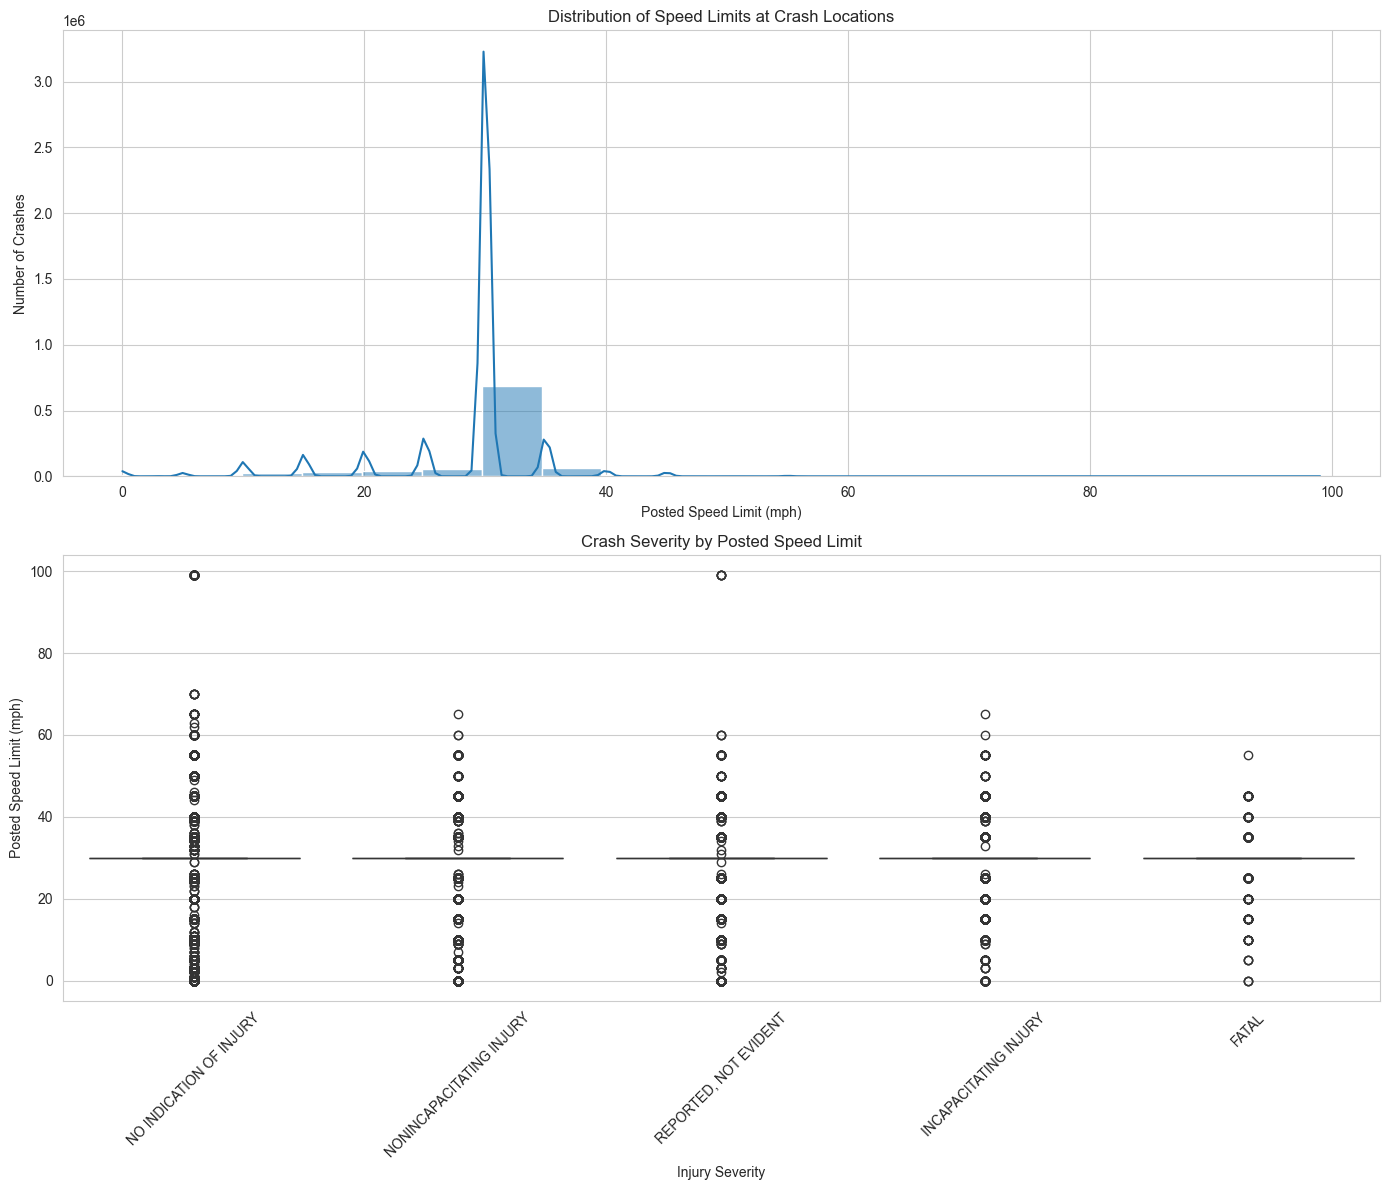

In [5]:

def plot_speed_analysis(crashes):
    """Analyze relationship between speed and crash severity"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Speed limit distribution at crash sites
    sns.histplot(data=crashes, x='POSTED_SPEED_LIMIT', bins=20, ax=axes[0], kde=True)
    axes[0].set_title('Distribution of Speed Limits at Crash Locations')
    axes[0].set_xlabel('Posted Speed Limit (mph)')
    axes[0].set_ylabel('Number of Crashes')
    
    # Speed vs. injury severity
    severity_order = crashes['MOST_SEVERE_INJURY'].value_counts().index
    sns.boxplot(data=crashes, x='MOST_SEVERE_INJURY', y='POSTED_SPEED_LIMIT', 
                order=severity_order, ax=axes[1], palette='viridis')
    axes[1].set_title('Crash Severity by Posted Speed Limit')
    axes[1].set_xlabel('Injury Severity')
    axes[1].set_ylabel('Posted Speed Limit (mph)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_speed_analysis(crashes)


# EDA: Exploring Traffic Camera Violations - Javid Uddin

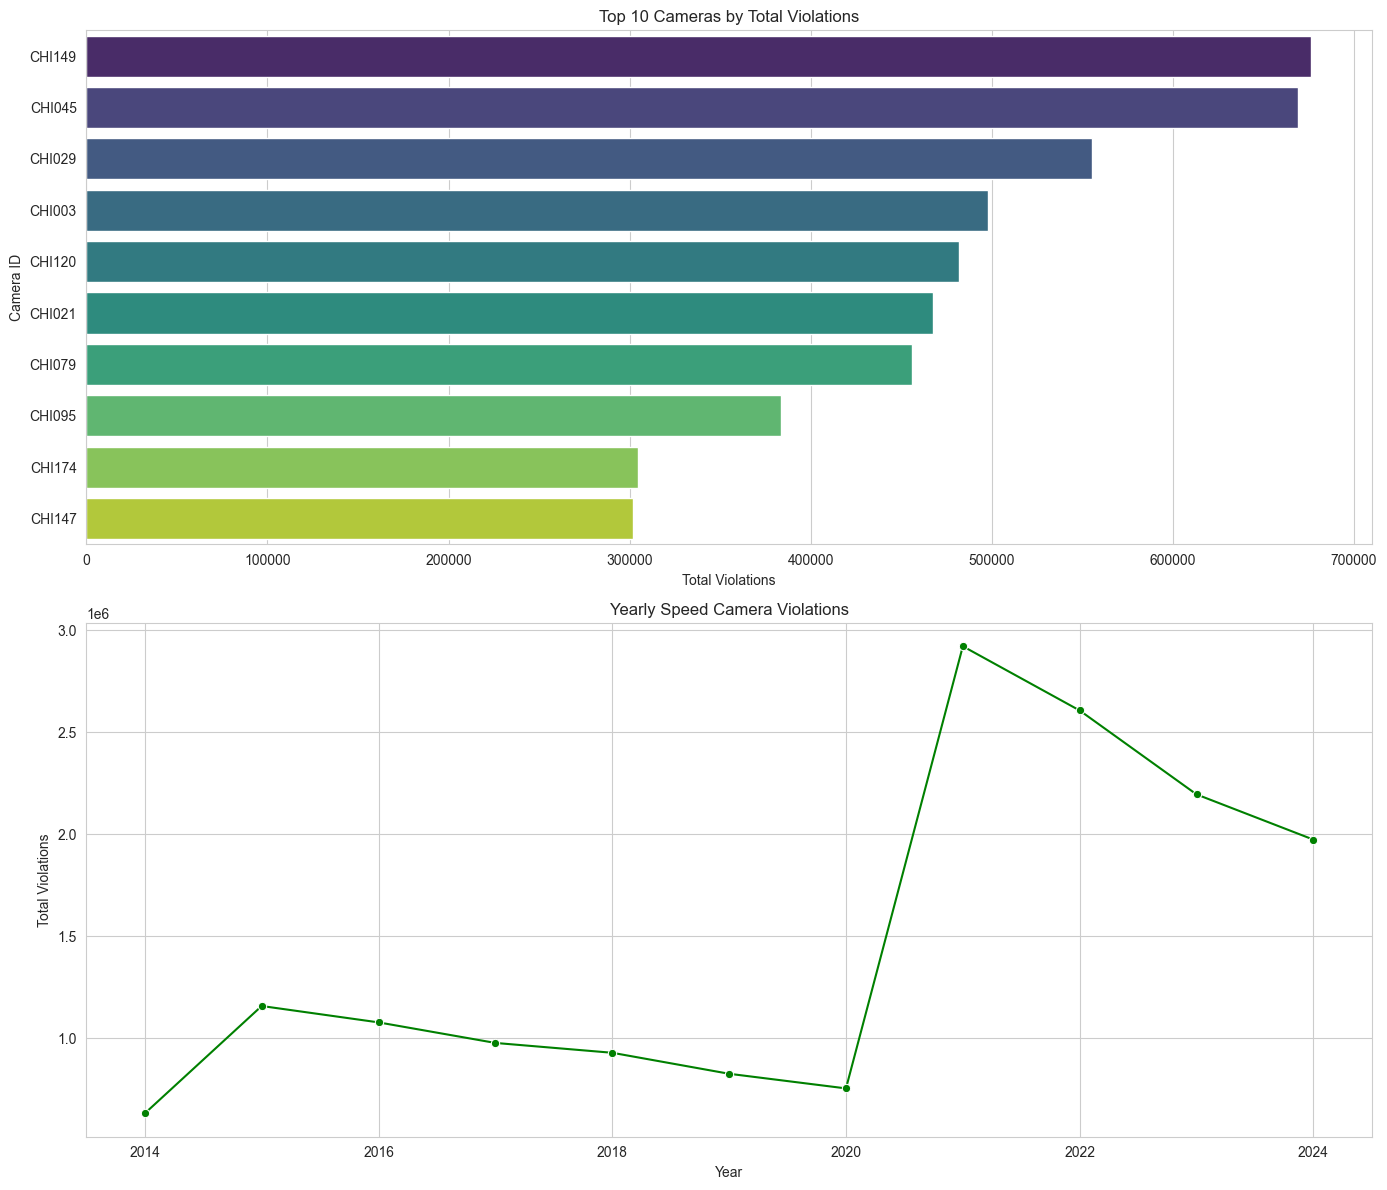

Camera Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 393158 entries, 14146 to 408260
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ADDRESS         393158 non-null  object        
 1   CAMERA ID       393153 non-null  object        
 2   VIOLATION DATE  393158 non-null  datetime64[ns]
 3   VIOLATIONS      393158 non-null  int64         
 4   X COORDINATE    393158 non-null  float64       
 5   Y COORDINATE    393158 non-null  float64       
 6   LATITUDE        393158 non-null  float64       
 7   LONGITUDE       393158 non-null  float64       
 8   LOCATION        393158 non-null  object        
 9   YEAR            393158 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(3)
memory usage: 31.5+ MB
None

Camera Data Description (Numerical Features):
                      VIOLATION DATE     VIOLATIONS  X COORDINATE  \
count              

In [7]:
def plot_camera_violations(cameras):
    """Analyze speed camera violation patterns"""
    if len(cameras) == 0:
        print("No camera data available")
        return
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Violations by camera
    top_cameras = cameras.groupby('CAMERA ID')['VIOLATIONS'].sum().nlargest(10)
    sns.barplot(x=top_cameras.values, y=top_cameras.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Cameras by Total Violations')
    axes[0].set_xlabel('Total Violations')
    axes[0].set_ylabel('Camera ID')
    
    # Violation trends over time
    if 'VIOLATION DATE' in cameras.columns:
        cameras['YEAR'] = cameras['VIOLATION DATE'].dt.year
        yearly_violations = cameras.groupby('YEAR')['VIOLATIONS'].sum()
        sns.lineplot(x=yearly_violations.index, y=yearly_violations.values, 
                     ax=axes[1], marker='o', color='green')
        axes[1].set_title('Yearly Speed Camera Violations')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Violations')
    
    plt.tight_layout()
    plt.show()


plot_camera_violations(cameras)

# camera data
print("Camera Data Overview:")
print(cameras.info())
print("\nCamera Data Description (Numerical Features):")
print(cameras.describe())

print("\nTop 10 camera IDs by total violations:")
print(cameras.groupby("CAMERA ID")['VIOLATIONS'].sum().sort_values(ascending=False).head(10))

print("\nNumber of unique camera locations:")
print(cameras['ADDRESS'].nunique())

print("\nViolation dates range:")
print(f"{cameras['VIOLATION DATE'].min()} to {cameras['VIOLATION DATE'].max()}")



# EDA: Exploring Traffic Congestion & Correlation - Javid Uddin

Traffic Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 210 to 1252
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEGMENTID        731 non-null    int64         
 1   STREET           731 non-null    object        
 2   DIRECTION        731 non-null    object        
 3   FROM_STREET      731 non-null    object        
 4   TO_STREET        731 non-null    object        
 5   LENGTH           731 non-null    float64       
 6   STREET_HEADING   731 non-null    object        
 7   COMMENTS         76 non-null     object        
 8   START_LONGITUDE  731 non-null    float64       
 9   START_LATITUDE   731 non-null    float64       
 10  END_LONGITUDE    731 non-null    float64       
 11  END_LATITUDE     731 non-null    float64       
 12  CURRENT_SPEED    731 non-null    int64         
 13  LAST_UPDATED     731 non-null    datetime64[ns]
dtypes: datetime64[ns](1),

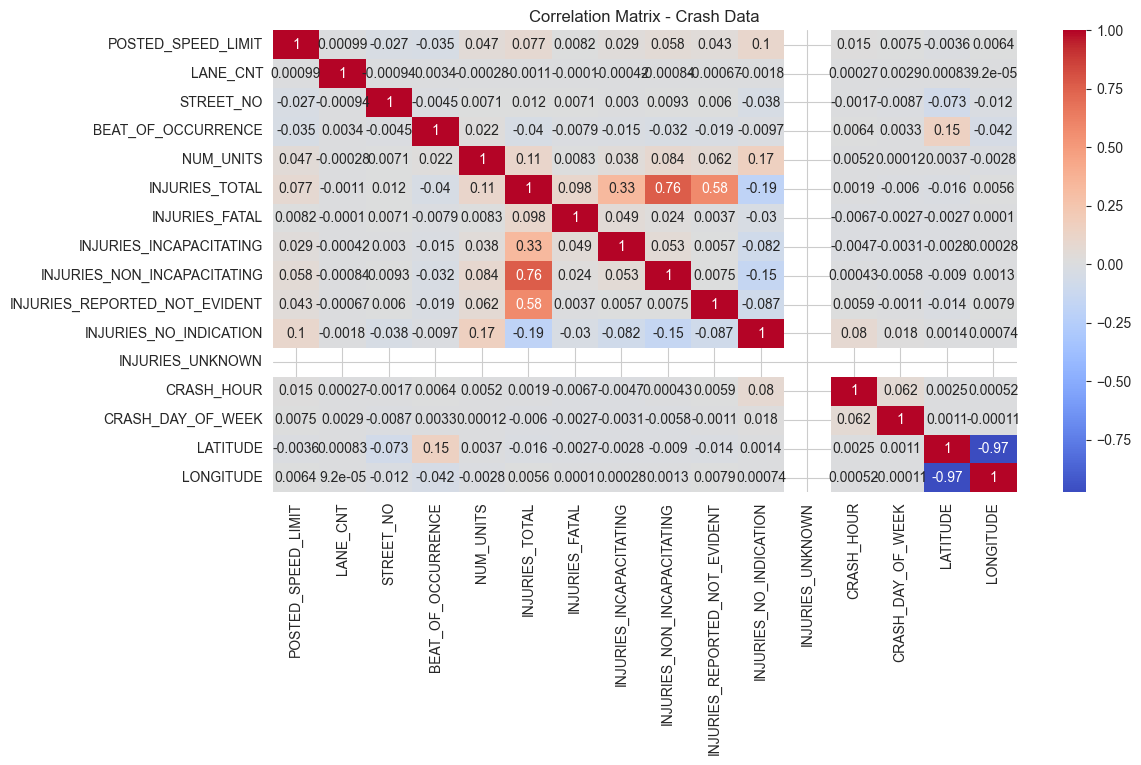

In [8]:
# traffic data
print("Traffic Data Overview:")
print(traffic.info())
print("\nTraffic Data Description:")
print(traffic.describe())

print("\nAverage current speed:")
print(f"Avg CURRENT_SPEED: {traffic['CURRENT_SPEED'].mean():.2f} mph")

print("\nCongestion Levels:")
if 'CONGESTION_LEVEL' in traffic.columns:
    print(traffic['CONGESTION_LEVEL'].value_counts())

# correlation of data
sns.heatmap(crashes.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Crash Data")
plt.show()

# EDA: Exploring the distribution of accidents in terms of lighting condition, traffic control device, and roadway surface condition - Shahriar Namvar

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
crash_df = pd.read_csv('traffic_crashes.csv')
crash_df.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,019d84ab0f03ace0b07075b0a7d83ba867b7dadad30410...,Y,03/29/2025 06:10:00 PM,35,STOP SIGN/FLASHER,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,1.0,4.0,0.0,18,7,3,41.793739,-87.697311,POINT (-87.697311324011 41.793738897511)
1,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
2,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,07/15/2023 11:00:00 PM,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,0.0,2.0,2.0,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258)
3,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,05/31/2020 01:13:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,0.0,4.0,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569)
4,03a3b86d3b62c8948e25623db7ccf326fed99eaa297b59...,NaN,03/15/2025 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,0,7,3,41.836784,-87.723610,POINT (-87.723610276569 41.836784034697)


In [49]:
ped_df = crash_df[(crash_df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]
ped_df['CRASH_DATE'] = pd.to_datetime(ped_df['CRASH_DATE'])
ped_df['CRASH_DAY_NAME'] = ped_df['CRASH_DATE'].dt.day_name()
ped_df['CRASH_HOUR_FROM_DATE'] = ped_df['CRASH_DATE'].dt.hour

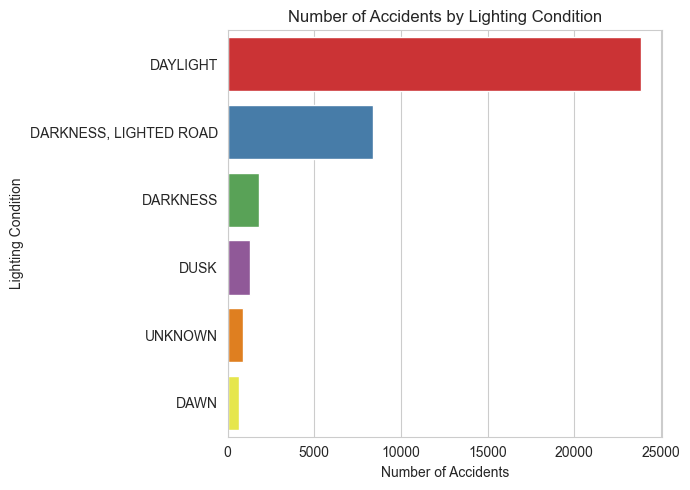

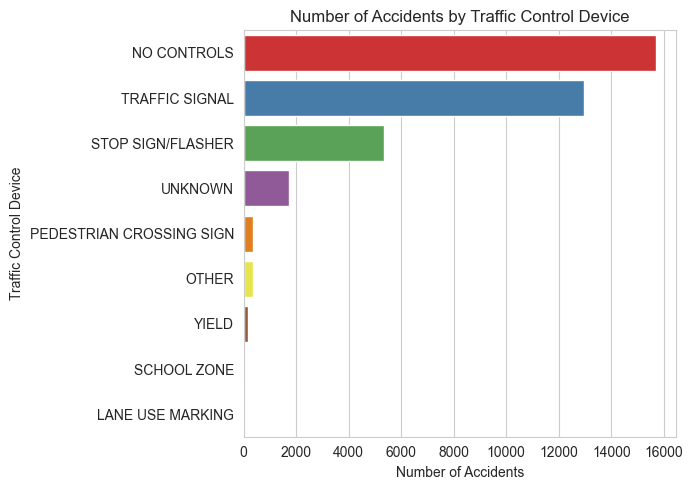

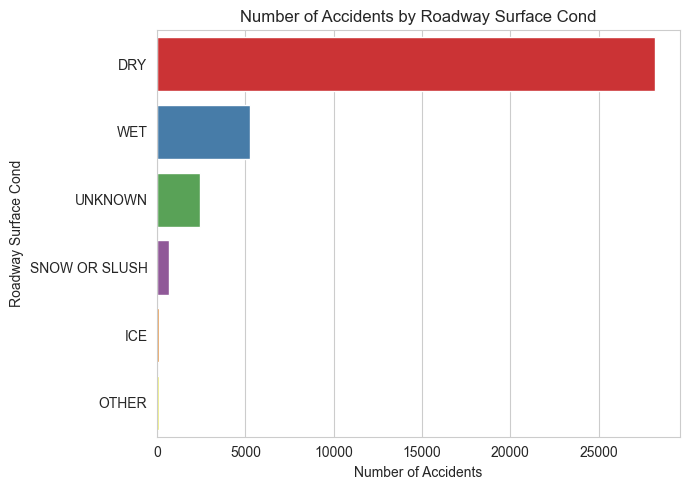

In [50]:
columns_to_plot = ['LIGHTING_CONDITION', 'TRAFFIC_CONTROL_DEVICE', 'ROADWAY_SURFACE_COND']

for col in columns_to_plot:
    value_counts = ped_df[col].value_counts()
    filtered = value_counts[value_counts > 50]
    
    if len(filtered) > 0:
        if len(filtered) > 10:
            filtered = filtered[:5]
        
        plt.figure(figsize=(7, 5))
        sns.barplot(x=filtered.values, y=filtered.index, palette='Set1')
        plt.xlabel('Number of Accidents')
        plt.ylabel(col.replace("_", " ").title())
        plt.title(f'Number of Accidents by {col.replace("_", " ").title()}')
        plt.tight_layout()
        plt.show()

# VISUAL #1: Camera Violations Trend - Javid Uddin
**Hypothesis**
The surge in speed camera violations from 2020 to 2021 resulted in a decrease in pedestrian-related and overall traffic crashes.

**Motivation for hypothesis**
It's fascinating to see trends in data, and how they result in direct (or indirect) relationships. In this case, it's interesting to see what caused the drastic increase in speed camera violations, especially on certain roads. Covid-19? More drivers on the roads? Additional lanes added to roads? Sneaky camera placements? We also see a drop-off in the timeline (2021-2024), thus we would like to know how that has affected traffic incidents, especially ones related to pedestrians.

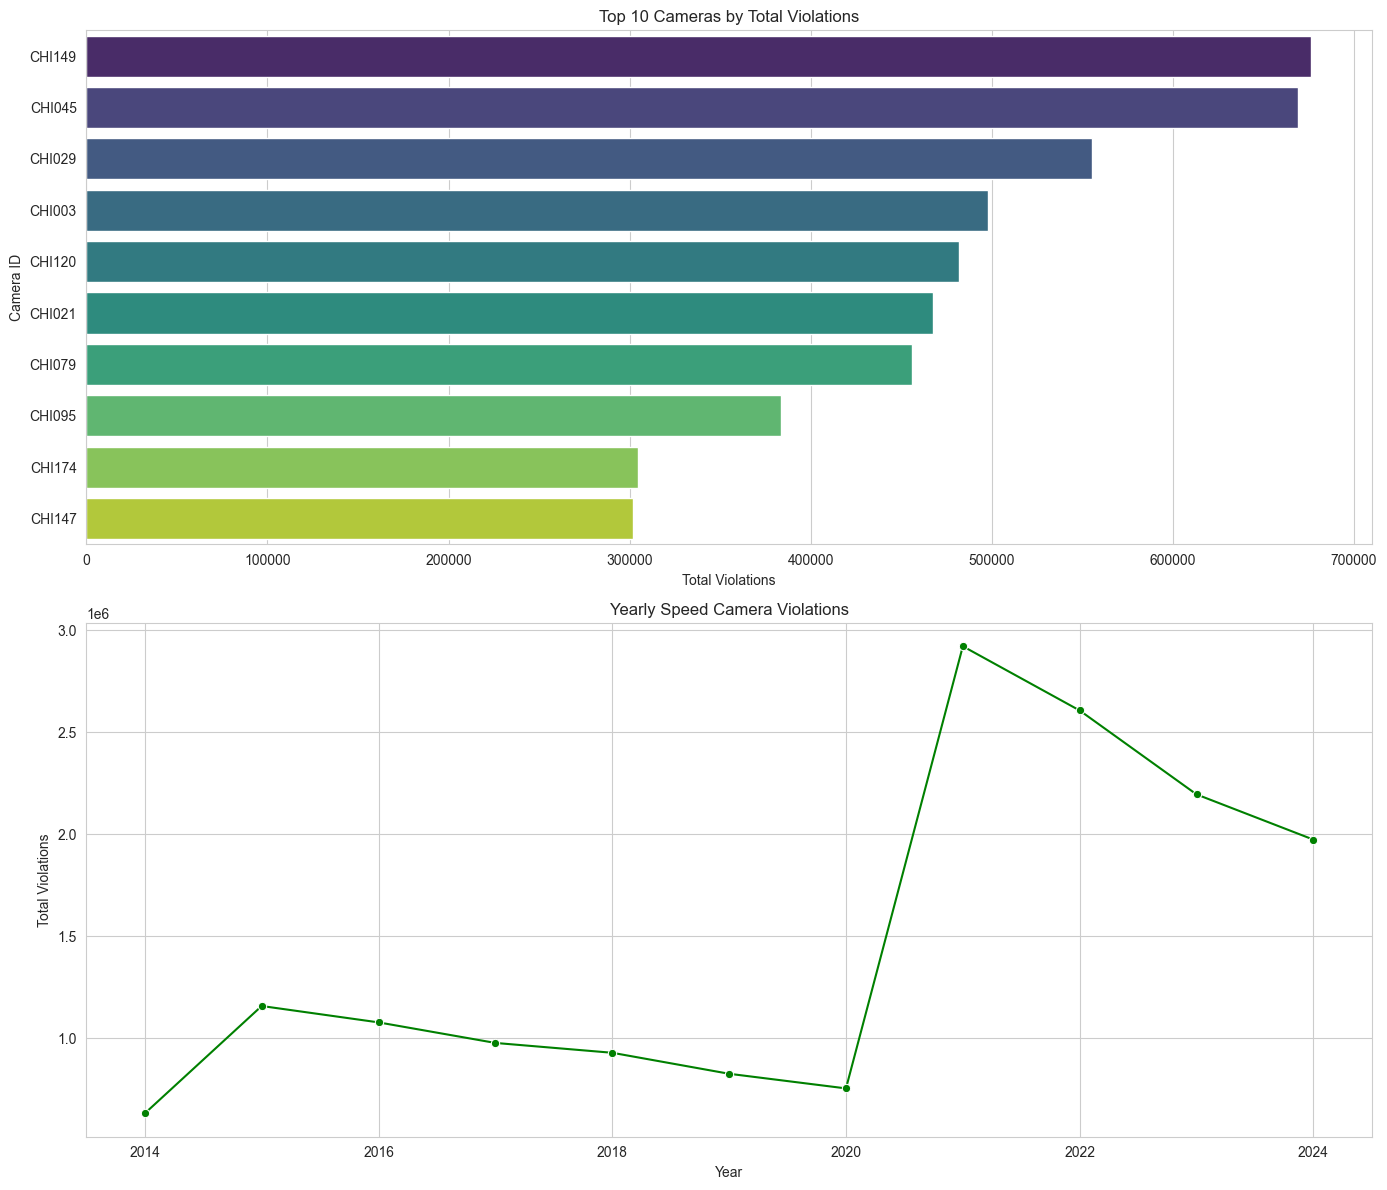

In [51]:
# Set up visualization
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def plot_camera_violations(cameras):
    """Analyze speed camera violation patterns"""
    if len(cameras) == 0:
        print("No camera data available")
        return
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Violations by speed camera
    top_cameras = cameras.groupby('CAMERA ID')['VIOLATIONS'].sum().nlargest(10)
    sns.barplot(x=top_cameras.values, y=top_cameras.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Cameras by Total Violations')
    axes[0].set_xlabel('Total Violations')
    axes[0].set_ylabel('Camera ID')
    
    # Violation trends over time
    if 'VIOLATION DATE' in cameras.columns:
        cameras['YEAR'] = cameras['VIOLATION DATE'].dt.year
        yearly_violations = cameras.groupby('YEAR')['VIOLATIONS'].sum()
        sns.lineplot(x=yearly_violations.index, y=yearly_violations.values, 
                     ax=axes[1], marker='o', color='green')
        axes[1].set_title('Yearly Speed Camera Violations')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Violations')
    
    plt.tight_layout()
    plt.show()

plot_camera_violations(cameras)

# Visual #2: Comparing the number of Pedestrain and Pedalcyclist relative to Lighting Conditions BarChart - Ameer Mustafa

### Hypothesis: Accidents are more likely to occur under darker lighting conditions compared to brighter lighting conditions.

#### Data revealed that most accidents actually occur during the daytime rather than at night. A few possible reasons are that there are more people outside during the daytime due to work or other commitments. Another potential reason is that accidents that occur at night end up in a hit and run which makes it hard to record the incident accurately. 

In [ ]:
# Visual one 
import altair as alt

# Label the type of crash in each DataFrame
pedestrian_df['Type'] = 'Pedestrian'
pedalcyclist_df['Type'] = 'Pedalcyclist'

# Combine both DataFrames into one that contains all pedastrian related accidents
all_pedastrian_df = pd.concat([pedestrian_df, pedalcyclist_df], ignore_index=True)

# Group by crash type and lighting condition
grouped = all_pedastrian_df.groupby(['Type', 'LIGHTING_CONDITION']).size().reset_index(name='Count')

# Create a grouped bar chart
bar_chart = alt.Chart(grouped).mark_bar().encode(
    x=alt.X('LIGHTING_CONDITION:N', title='Lighting Condition', sort='-y'),
    y=alt.Y('Count:Q', title='Number of Crashes'),
    color=alt.Color('Type:N', title='Crash Type'),
    column=alt.Column('Type:N', title='Crash Type'), # Create separate columns for each crash type
    tooltip=['Type:N', 'LIGHTING_CONDITION:N', 'Count:Q']
).properties(
    title='Pedestrian vs. Pedalcyclist Crashes by Lighting Condition'
).configure_axisX(labelAngle=-45)

bar_chart.show()
![Visual2](visuals/visualization_2.png)


alt.Chart(...)

# Visual #3: Comparing the number of Pedestrain and Pedalcyclist relative to Lighting Conditions Linechart - Ameer Mustafa

### Hypothesis: The number of Pedestrain related accidents will be greater than Pedalcyclist

#### The data revealed that our hypothesis was correct. There are consistent records that pedestrian-related accidents are far greater than pedal-cyclists regardless of the lighting condition. An explanation could be that the number of cyclists is much smaller than the number of people who walk in the city. Therefore, the sample space of pedal-cyclists is much smaller, and naturally the number of pedestrian-only incidents will be far greater. 

In [ ]:
import altair as alt

# Line plot
line_chart = alt.Chart(grouped).mark_line(point=True).encode(
    x=alt.X('LIGHTING_CONDITION:N', title='Lighting Condition', sort='-y'),
    y=alt.Y('Count:Q', title='Number of Crashes'),
    color=alt.Color('Type:N', title='Crash Type'),
    tooltip=['Type:N', 'LIGHTING_CONDITION:N', 'Count:Q']
).properties(
    title='Pedestrian vs. Pedalcyclist Crashes by Lighting Condition (Line Plot)'
).configure_axisX(labelAngle=-45)

line_chart.show()

![Visual3](visuals/visualization_3.png)

alt.Chart(...)

# Visual #4: Average Daily Pedestrian-related Accidents in 2023 with Seasonal Trends  - Ameer Mustafa

### Hypothesis: Pedestrian-related Accidents will be greatest during winter due to bad weather conditions

#### Based on the data, the summer season tended to have the highest number of pedestrian-related accidents with an average daily incident record of 15.7 per day. The second highest was winter with an average of 14.1 per day. Although the summer had the highest average, the day with the most amount of pedestrian-related accidents occurred during winter with a total count of 32 accidents on day 355. Our hypothesis was not entirely incorrect, it did not have the highest average seasonal daily violation but did contain the highest daily incident count. Another interesting finding is that day 355 is December 21st which is really close to Christmas Day. Given these results, we can explore in the future if all the days prior to a holiday tend to have higher pedestrian-related incidents due to people rushing to buy gifts for the holidays. 

In [ ]:
import pandas as pd
import altair as alt

# Load + preprocess
df = pd.read_csv('traffic_crashes.csv')
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_2023 = df[df['CRASH_DATE'].dt.year == 2023].copy()  # Make an explicit copy to avoid SettingWithCopyWarning
df_2023['DayOfYear'] = df_2023['CRASH_DATE'].dt.dayofyear  

# Filter for pedestrian and pedalcyclist crashes only
df_2023 = df_2023[df_2023['FIRST_CRASH_TYPE'].isin(['PEDESTRIAN', 'PEDALCYCLIST'])]

# Group by day
daily_counts = df_2023.groupby('DayOfYear').size().reset_index(name='Accident_Count')

# Assign season
def get_season(day):
    if 80 <= day <= 172:
        return 'Summer'
    elif 173 <= day <= 265:
        return 'Fall'
    elif 266 <= day <= 365:
        return 'Winter'
    else:
        return 'Spring'

daily_counts['Season'] = daily_counts['DayOfYear'].apply(get_season)

# Compute seasonal averages
season_avg = daily_counts.groupby('Season')['Accident_Count'].mean().round(1).to_dict()

# Update season names with average for the legend
daily_counts['Season Label'] = daily_counts['Season'].apply(lambda s: f"{s} (avg: {season_avg[s]})")

# Season color scale
season_colors = {
    "Spring (avg: {})".format(season_avg["Spring"]): "lightgreen",
    "Summer (avg: {})".format(season_avg["Summer"]): "lightyellow",
    "Fall (avg: {})".format(season_avg["Fall"]): "lightcoral",
    "Winter (avg: {})".format(season_avg["Winter"]): "lightblue",
}

# Background season ranges
seasons_df = pd.DataFrame([
    {"start": 1, "end": 79, "season": f"Spring (avg: {season_avg['Spring']})"},
    {"start": 80, "end": 172, "season": f"Summer (avg: {season_avg['Summer']})"},
    {"start": 173, "end": 265, "season": f"Fall (avg: {season_avg['Fall']})"},
    {"start": 266, "end": 365, "season": f"Winter (avg: {season_avg['Winter']})"}
])

# Background rects
background = alt.Chart(seasons_df).mark_rect().encode(
    x=alt.X('start:O'),
    x2='end:O',
    color=alt.Color('season:N', scale=alt.Scale(domain=list(season_colors.keys()), range=list(season_colors.values())),
                    legend=alt.Legend(title="Season (Average Accidents)")),
    opacity=alt.value(0.3)
)

# Line + points chart
base = alt.Chart(daily_counts).encode(
    x=alt.X('DayOfYear:O', title='Day of Year', axis=alt.Axis( tickCount=4, values=[79, 172, 265, 365], labelAngle=-45)),
    y=alt.Y('Accident_Count:Q', title='Number of Accidents'),
    tooltip=['DayOfYear', 'Accident_Count', 'Season']
)

line = base.mark_line(interpolate='basis')
points = base.mark_point(filled=True, size=60)

# Combine
chart = (background + line + points).properties(
    width=1000,
    height=400,
    title='2023 Daily Traffic Accidents with Seasonal Averages'
)

chart

![Visual4](visuals/visualization_4.png)

alt.LayerChart(...)

# Visual #5: Accident Frequency by Day and Hour (Heatmap) - Shahriar Namvar

### Hypothesis: Accidents are more likely to happen on weekdays during afternoon hours, mostly around rush hours and commuting hours. 

#### The heatmap illustrates that the majority of accidents occurred during rush hour and between 3 and 6 p.m. and 7 and 8 a.m. Tuesday through Friday had the highest afternoon accident rates among the weekdays. Weekends, however, have a noticeably lower accident rate. Surprisingly, Thursday around 5 PM seems to have the highest number of accidents among all time/day data making it potentially the most dangerous time to be on the road during the week.

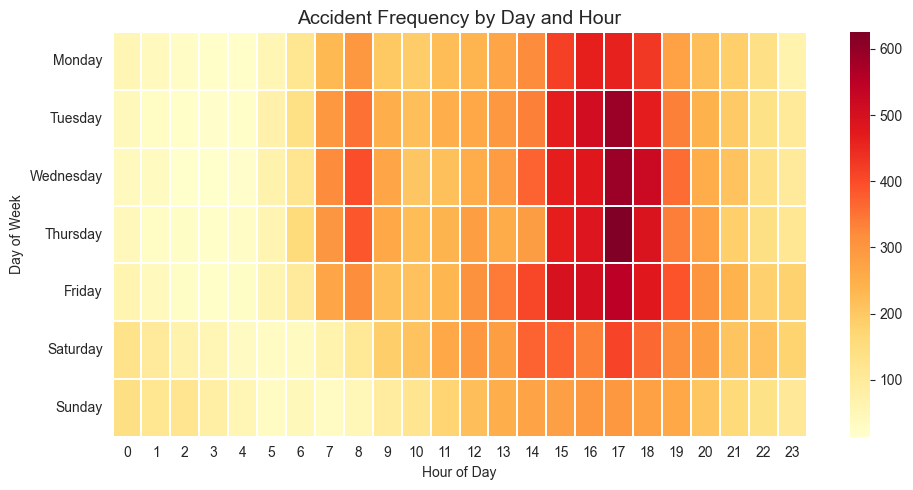

In [56]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Accidents by Hour of Day (heatmap by day vs hour)
heatmap_data = ped_df.groupby(['CRASH_DAY_NAME', 'CRASH_HOUR_FROM_DATE']).size().unstack(fill_value=0).reindex(index=day_order)
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.1)
plt.title("Accident Frequency by Day and Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

# Visual #6: Lighting Conditions Under Top Weather Types - Shahriar Namvar

### Hypothesis: Accidents are more likely to occur during adverse weather and lighting conditions and under clear weather conditions due to poor visibility.

#### The data suggest that adverse weather conditions are not the key factor in accidents. On the contrary, majority of accidents occured in clear weather conditions during daylight when visibility is at its greatest! This contradicts our hypothesis and implies that poor weather condition such as rain and snow can not necessarily increase the number of accidents. Although accidents can occur, they are comparatively less common in rainy, snowy, or low-light situations like dusk or darkness. In fact, poor weather conditions might cause the drivers to be more cautious and careful while driving. 

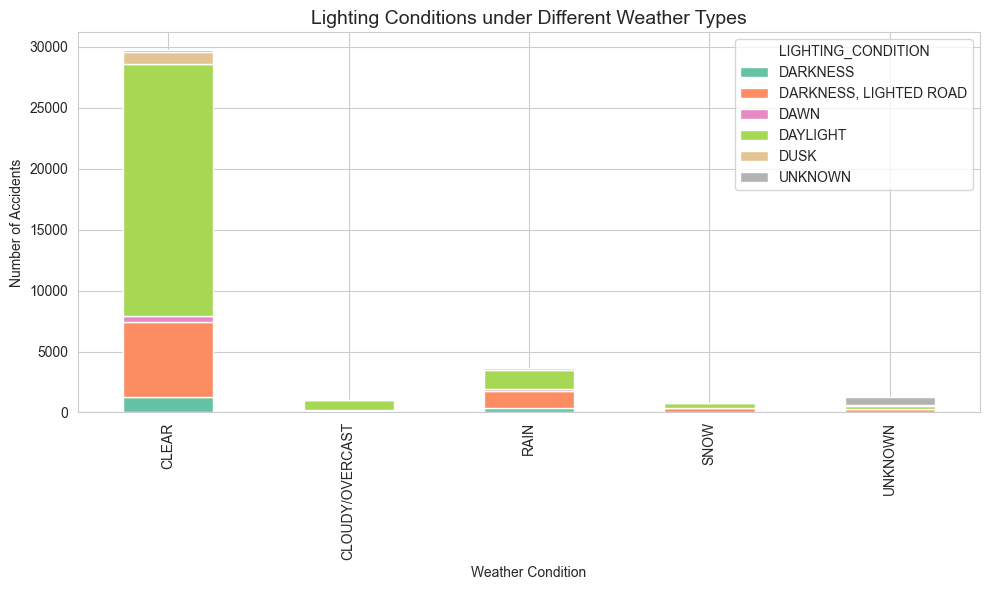

In [57]:
top_weather = ped_df['WEATHER_CONDITION'].value_counts().head(5).index
weather_lighting = ped_df[ped_df['WEATHER_CONDITION'].isin(top_weather)]
weather_lighting_ct = pd.crosstab(weather_lighting['WEATHER_CONDITION'], weather_lighting['LIGHTING_CONDITION'])

weather_lighting_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Lighting Conditions under Different Weather Types", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# ML Analysis

## First Analysis: Identify Hotspots for Pedestrian Related Accidents - Samuel Haddad

### In this analysis, we want to identify the areas in the city with the most pedestrian related incidents so we can focus our plans on improving walkability and pedestrian safety in the areas that are in the most need of help. To do this, we will perform clustering techniques to identify these hotspots. Idealy, we can perform clustering techniques on a highly granular level so that we can pinpoint the streets / intersections that have many incidents so we can add traffic safety measures to these streets / intersections, potentially utilizing speed cameras, stop lights, speed bumps, etc (the best type of safety measure to use is another thing we are trying to find out in this project!). 

#### We first want to find the neighborhoods in most need of help so that we can perform clustering specifically on these neighborhoods to find the streets / intersections that are most dangerous for walkers. 

In [58]:
# filter out the top 10 zip codes from the joined dataframe on 'zip' by number of pedestrian crashes
top5_most_crashes = chi_crashes_gdf.groupby('zip').size().sort_values(ascending=False).head(5)
top5_most_crashes

zip
60647    1408
60614    1282
60618    1163
60657    1092
60608    1069
dtype: int64

#### We're going to run DBSCAN on these top 5 neighborhoods listed above, so we created a function that runs DBSCAN on the passed in neighborhood and plots a graph of where / what hotspots were found for each neighborhood, along with plotting a 'cluster center' to give a rough idea of where the center of each cluster DBSCAN found is. 

In [59]:
from sklearn.cluster import DBSCAN

# Function to allow us to run the DBSCAN analysis on a specific neighborhood. For this function,
# along with the zip code of the neighborhood to analyze, we pass in the parameters eps_meters and
# min_samples. ers_meters represents how far, in meters, a point can be from another point in the
# same cluster, so this allows us to control how far away we allow a cluster to include an accident
# as part of its group. min_samples represents the minimum number of accidents needed for a cluster
# to be recognized and not considered noise / irrelevant. 
def neighborhood_dbscan(df, zip_code, eps_meters=75, min_samples=5):
    # Filter df to only look at specified zip code
    neighborhood_df = df[df['zip'] == zip_code].copy()
    coords = neighborhood_df[['LATITUDE', 'LONGITUDE']]

    # Convert lat/long to radians for haversine distance metric in DBSCAN call below
    coords_rad = np.radians(coords)

    # Roughly convert eps_meters to radians
    eps_rad = eps_meters / 6371000.0

    # Run DBSCAN with haversine metric
    db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric='haversine')
    labels = db.fit_predict(coords_rad)
    neighborhood_df['cluster'] = labels

    # Split data into clustered and noise sets to enhance the readability of the plot
    clustered = neighborhood_df[neighborhood_df['cluster'] != -1]
    noise = neighborhood_df[neighborhood_df['cluster'] == -1]

    # Plot the clusters found using DBSCAN
    plt.figure(figsize=(10, 10))
    
    # Points belonging to a cluster are plotted in color and large so users can quickly see them
    plt.scatter(clustered['LONGITUDE'], clustered['LATITUDE'], 
                c=clustered['cluster'], cmap='tab10', s=40, label='Clustered Points')
    
    # Points that do not belong to any cluster and are noise are plotted in gray and small to obscure them
    plt.scatter(noise['LONGITUDE'], noise['LATITUDE'], 
                color='gray', alpha=0.3, s=10, label='Noisy Points)')

    # Create and plot cluster centers to mark potential areas to add traffic measures for each cluster
    cluster_centers = clustered.groupby('cluster')[['LATITUDE', 'LONGITUDE']].mean()
    plt.scatter(cluster_centers['LONGITUDE'], cluster_centers['LATITUDE'],
                c='black', marker='X', s=100, label='Cluster Center')

    plt.title(f"DBSCAN Pedestrian Crash Clusters in ZIP {zip_code}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

#### Using the 5 neighborhoods with the most crashes, we now perform DBSCAN using the above function in each of these neighborhoods to find the hotspots in each one so we know where to add safety measures to. The top 5 neighborhoods in order are: 
#### 60647, 60614, 60618, 60657, 60608

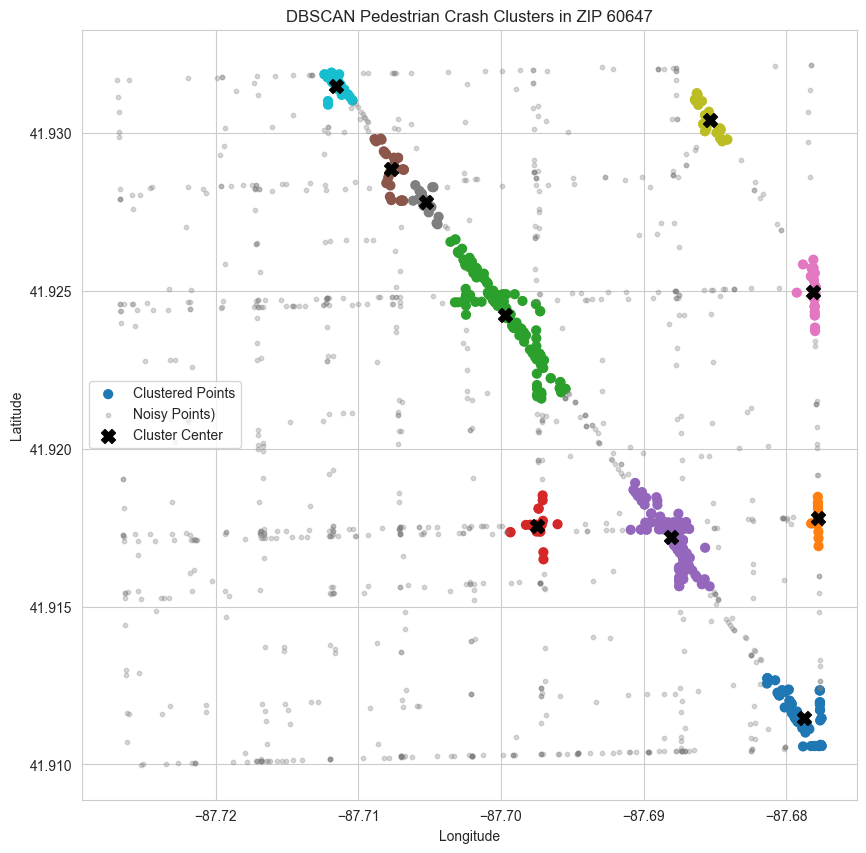

In [60]:
pedestrian_crash_df = chi_crashes_gdf
# Run clustering on ZIP 60647 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60647', eps_meters=100, min_samples=20)

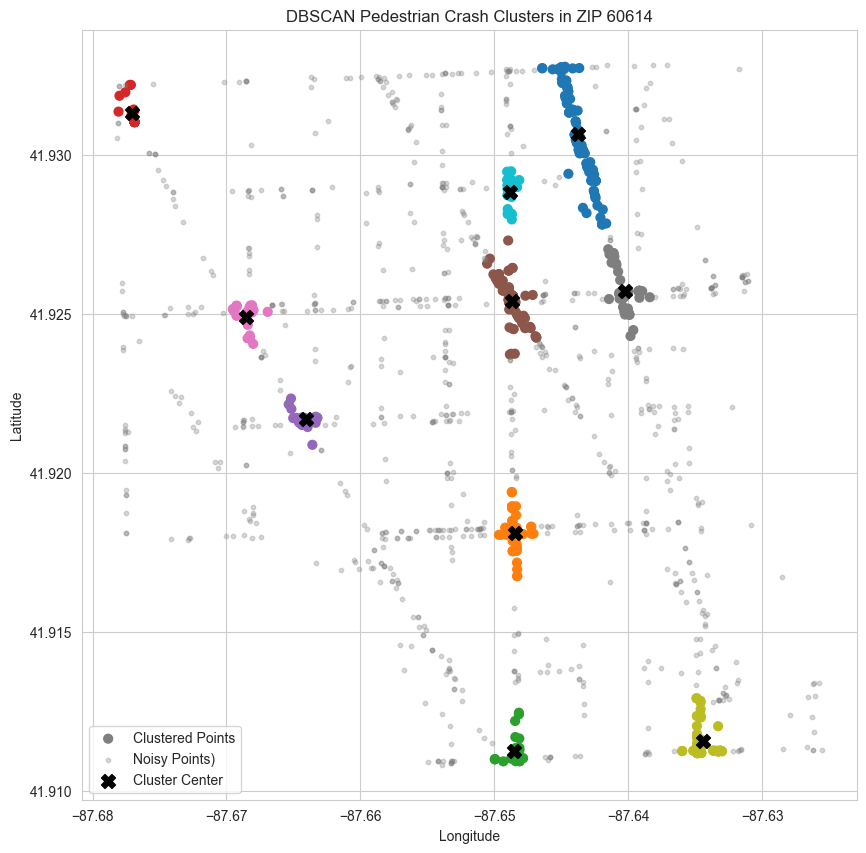

In [61]:
# Run clustering on ZIP 60614 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60614', eps_meters=100, min_samples=20)

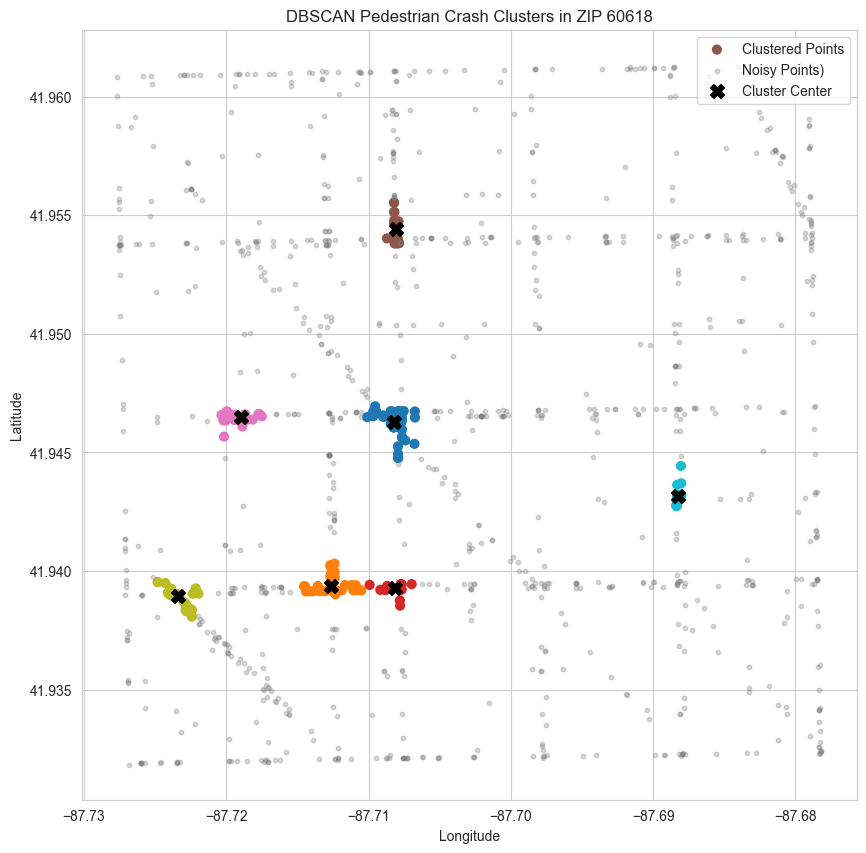

In [62]:
# Run clustering on ZIP 60618 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60618', eps_meters=100, min_samples=20)

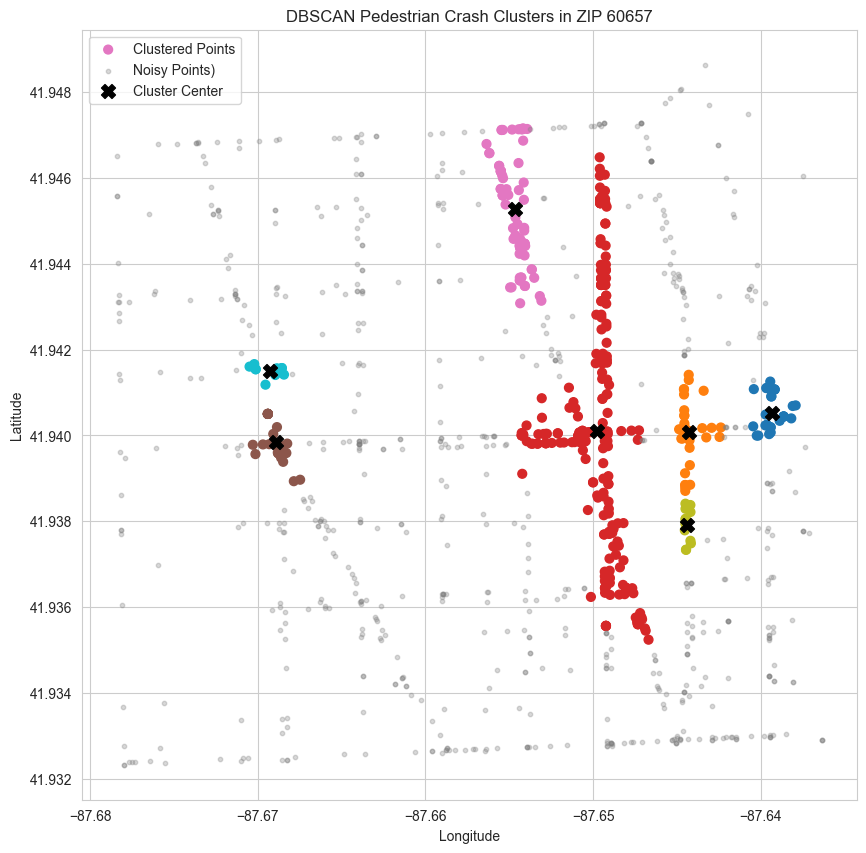

In [63]:
# Run clustering on ZIP 60657 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60657', eps_meters=100, min_samples=20)

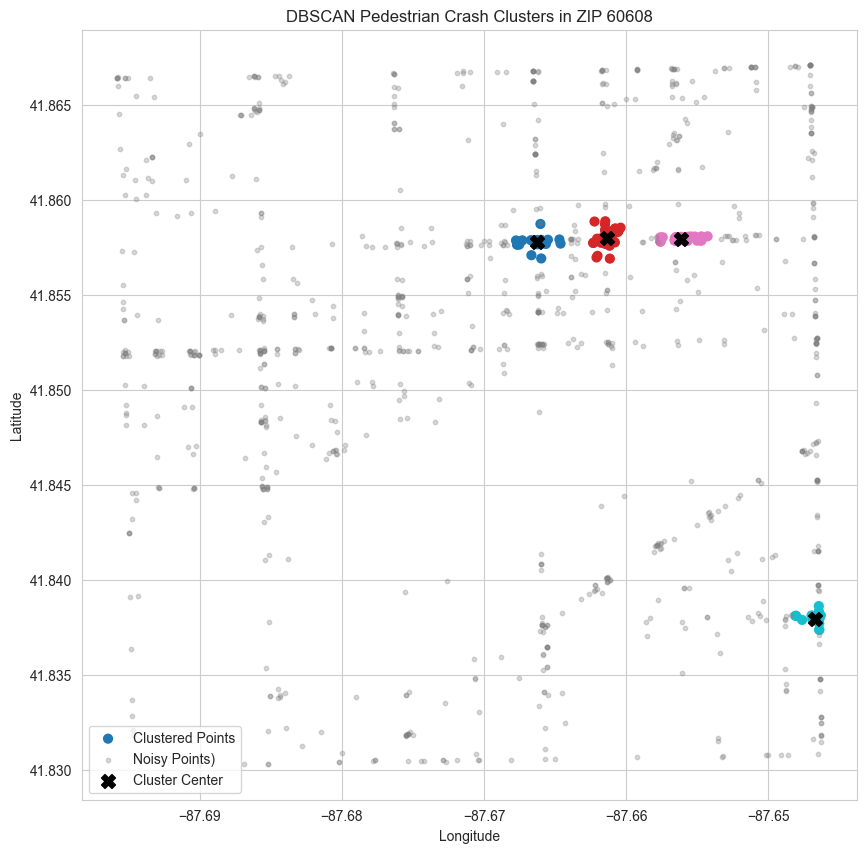

In [64]:
# Run clustering on ZIP 60608 to see the clusters formed by DBSCAN
clustered_df = neighborhood_dbscan(pedestrian_crash_df, zip_code='60608', eps_meters=100, min_samples=20)

## Second ML Analysis: Rank Feature Importance for Pedestrian Accidents - Samuel Haddad

### In this analysis, we want to identify which features of our dataset (the attributes / columns) are most impactful and important in determining what causes a pedestrian related incident. To do this, we will use 3 ML techniques: Logisitc Regression, Random Forest, and XGBoost. We will use all of these techniques to see how they assign weights to the features, and this will clue us in to which features are most important for pedestrian related accidents.

#### To begin, we will first need to transform the data a bit to make it sutiable for the binary classification techniques we will be using.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

In [ ]:
ped_crash_df = traf_crash_df
ped_crash_df['pedestrian_related_crash'] = (traf_crash_df['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (traf_crash_df['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')
ped_crash_df

# only use columns that could be influential to determining if an incident is pedestrian related
data = ped_crash_df[['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROAD_DEFECT']]

# simple one-hot encoding for categorical columns
data = pd.get_dummies(data, drop_first=True)

# create labels to use in train/testing (labels will be 0 for non pedestrian, 1 for pedestrian)
class_label = ped_crash_df['pedestrian_related_crash'].astype(int)

#### Next, we split our data into train and test sets, 80% of the data will be for training, and 20% for testing.

In [27]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, class_label, test_size=0.2)

#### Our dataset is highly imbalanced (~4% pedestrian related), so we tried to use some techniques like SMOTE (to synthesize new data points for the minority class) as well as undersampling so that our models below have a better chance at predicting whether crashes were pedestrian related or not. Unfortunately, these techniques to manipulate our dataset before training the models below did not have the desired effect. The sampling techniques, as used below, did not help the models predict better, and overall they performed worse then when we instead adjusted class weights to give more weight (18x) to the minority class of pedestrian related incidents. In the final deliverable for this project, we hope to further explore why the sampling failed and attempt to revise it so that we can train models that better predict both classes.

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.2)  # Upsample minority to 20% of majority
# Create new training set with the SMOTE data
X_smote, y_smote = smote.fit_resample(X_train, y_train) 
undersample = RandomUnderSampler(sampling_strategy=0.5)  # Downsample majority to 50% of minority
# Update training set with the undersampled majority class
X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote) 

#### (Note: However, all hope is not lost, as the goal of this ML analysis was to find which features were most important in determining whether or not a crash was pedestrian related or not. We can still accomplish this task through analyzing the 3 models below and their coefficients / feature importances, as even though the models are not great predictors, they did learn helpful decision boundaries to tell us which features are most important in determining pedestrian / non pedestrian accidents!)

#### Now we can fit a Logistic Regression model on the training set and run the model over the test set to see how well it performs. On top of this, we'll plot the 20 most important features as determined by the Logisitic Regression model in assessing whether a crash was pedestrian related or not. 

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89    178877
           1       0.06      0.27      0.10      7540

    accuracy                           0.81    186417
   macro avg       0.51      0.55      0.50    186417
weighted avg       0.93      0.81      0.86    186417



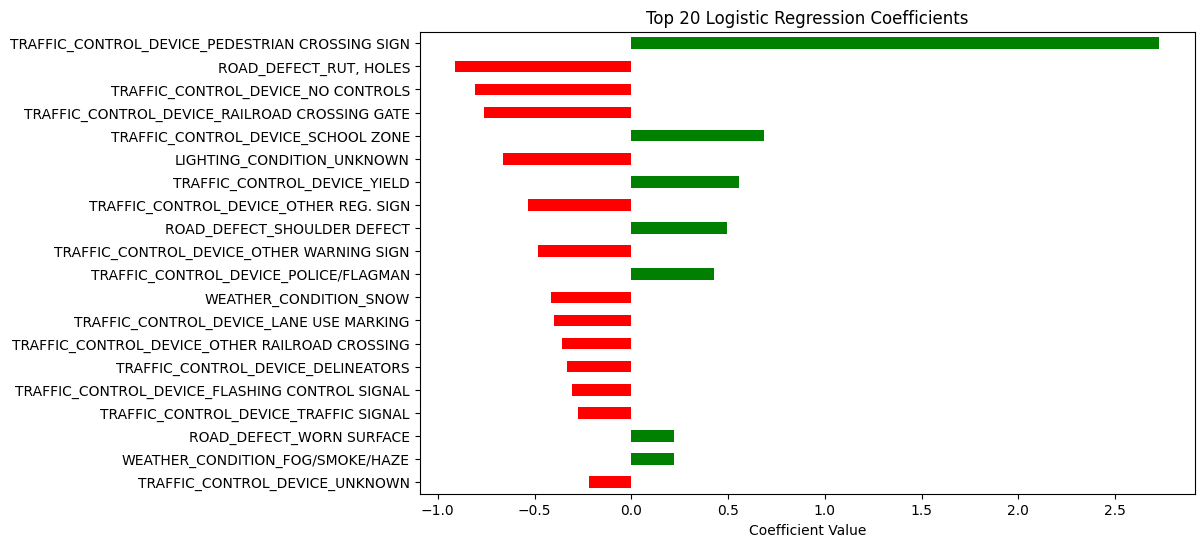

In [24]:
# Create a logistic regression model and then train it on the training set
# note: it is important we add class_weight={0: 1, 1: 18} as our dataset is highly
# imbalanced (~37k pedestrian accidents, ~930k total accidents). This parameter
# helps the model not just predict a class of 0 (non pedestrian) everytime and 
# attempt to learn something meaningful from the data. We are weighting class 1
# 18 times more heavily to try and offset the imbalance. We landed on 18 by testing
# various values such as 10, 20, 15, and so on until we landed on 18 as the best value.
# log_regression = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 18})
log_regression = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 18})
log_regression.fit(X_train, y_train)

# Run the model on the test set and print the classification report, as this gives
# us important details such as accuracy, precision, recall, and f1 score
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_regression.predict(X_test)))

# Getting the feature importance of the attributes to see which are most important as determined by Logisitic Regression
coeffs = pd.Series(log_regression.coef_[0], index=X_train.columns)

# Get top 20 features by absolute coefficient values to see the most influencial attributes
top_coeffs = coeffs.abs().sort_values(ascending=False).head(20)
top_features = top_coeffs.index
top_values = coeffs[top_features]

# Add some coloring for a more interpretable plot below
colors = ['green' if val > 0 else 'red' for val in top_values]

# Plot horizontal bar chart of the coefficients to show the most
# influencial attributes and the direction they influence the prediction
# (green means increases likelihood of pedestrian crash, red vice versa)
plt.figure(figsize=(10, 6))
top_values.plot(kind='barh', color=colors)
plt.title("Top 20 Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()

#### Now we'll use XGBoost to do the same thing, try and extract the most important features in determining whether an accident is pedestrian related or not (using the same training and test splits as created above).

              precision    recall  f1-score   support

           0       0.96      0.89      0.92    178877
           1       0.07      0.21      0.11      7540

    accuracy                           0.86    186417
   macro avg       0.52      0.55      0.51    186417
weighted avg       0.93      0.86      0.89    186417



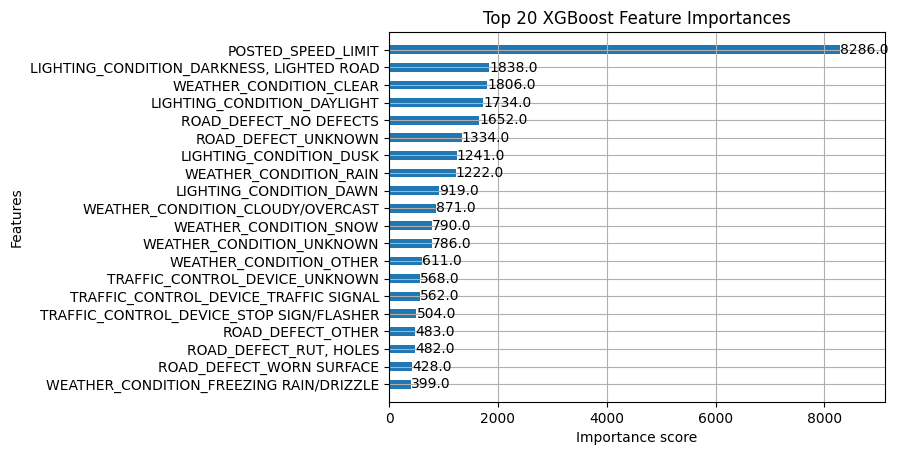

In [25]:
# Set the XGBoost model. The scale_pos_weight works the same way as class_weight worked
# above in the logistic regression model, so we also set it to 18 (meaning class 1 is weighted 18x). 
# n_estimators dictates the number of 'boosting rounds' (similar to number of trees in random forest).
# max_depth controls how deep the tree is allowed to go, and the learning_rate controls how quickly the
# model learns its parameters and weights. 
xgb_model = xgb.XGBClassifier(scale_pos_weight=18, n_estimators=200, max_depth=10, learning_rate=0.05)
# xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.05)
# Fit the model over the training set
xgb_model.fit(X_train, y_train)

# Run the fitted model on the test set to see how well it performs
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plotting the feature importances using XGBoosts built-in plotting function
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20, height=0.5)
plt.title("Top 20 XGBoost Feature Importances")
plt.show()

#### Now we'll use Random Forest to do the same thing, try and extract the most important features in determining whether an accident is pedestrian related or not (using the same training and test splits as created above).

              precision    recall  f1-score   support

           0       0.96      0.89      0.93    178877
           1       0.07      0.19      0.10      7540

    accuracy                           0.86    186417
   macro avg       0.52      0.54      0.51    186417
weighted avg       0.93      0.86      0.89    186417



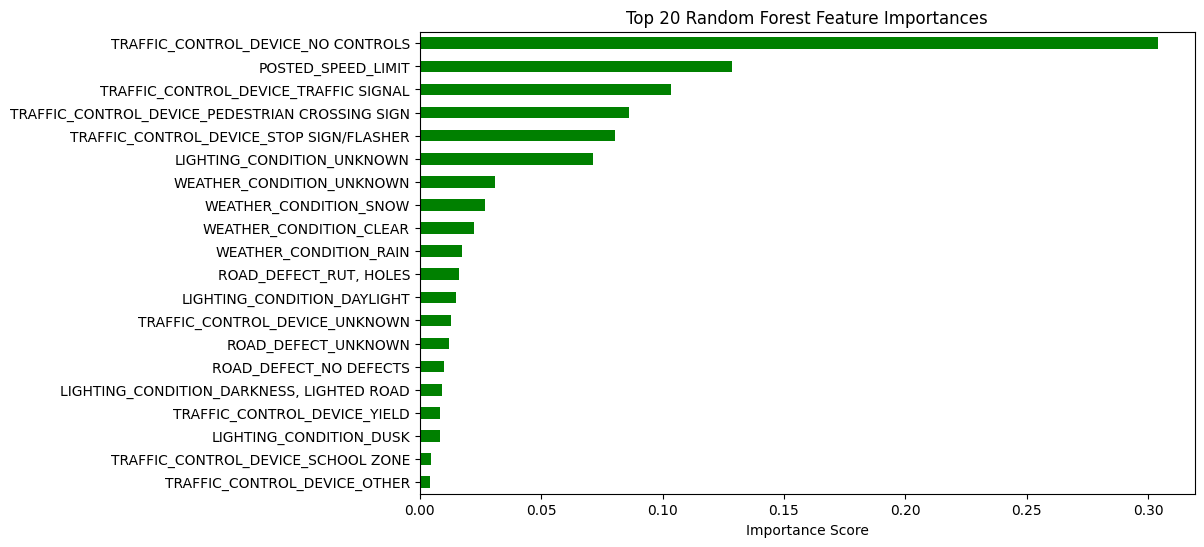

In [26]:
# Set the Random Forest model. The class_weight works the same way as class_weight worked above
# in the logistic regression / XGBoost model, so we also set it to 18 (meaning class 1 is weighted 18x). 
# n_estimators dictates the number of trees allowed in random forest. max_depth controls how deep the tree 
# is allowed to go, and the min_samples_split controls how many samples are needed to create a split (tree).
rf = RandomForestClassifier(class_weight={0: 1, 1: 18}, n_estimators=200, max_depth=10, min_samples_split=10)
# rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10)
# Fit the model over the training set and run the fitted model on the test set
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

# # Getting the feature importance of the attributes to see which are most important as determined by random forest 
importances = rf.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns)

# Get top 20 features by absolute coefficient values to see the most influencial attributes
top_rf = rf_importances.abs().sort_values(ascending=False).head(20)

# Plot horizontal bar chart of the feature importances to show the most
# influencial attributes that the random forest model learned
plt.figure(figsize=(10, 6))
top_rf.plot(kind='barh', color='green')
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

### Overall for this ML analysis, we can see that the models did not serve as good predictors of whether a crash would be pedestrian / non-pedestrian That is okay, as the goal of this ML analysis was to find which features were most important in determining whether or not a crash was pedestrian related or not. We can still accomplish this task through analyzing the 3 models and their coefficients / feature importances, as even though the models are not great predictors, they did learn helpful decision boundaries to tell us which features are most important in determining pedestrian / non pedestrian accidents! Going forward in the project, we can use the output visuals above from these models to determine what safety measures might be best to reduce pedestrian accidents and improve walkability, and can further tune these models and attempt sampling techniques again to land on the best measures with more confidence. 

# Reflection - TODO

#### TODO

# Next Steps - Samuel Haddad

#### Over the next month, we want to continue to develop and improve our ML analysis on feature importance to determine the best safety measures we can implement to reduce pedestrian incidents and improve walkability. Enhancing this model will help us be more confident in the safety measures we decide to implement. We want to continue adding more ML analyses to further pinpoint the hotspots of pedestrian related incidents, determine the most important features, and predict the traffic disruption that more safety measures could cause. 

#### On top of this, we want to further explore our datasets and come up with more hypotheses about our datasets and its features, such as what the most important factors are in pedestrian accidents, how much certain factors impact fatal injuries, etc. Refining our current hypotheses and creating new ones will help us discover more trends, patterns, and interesting findings in our datasets. The more hypotheses we think of, the more conclusive results we can collect!

#### To do this, we will continue exploring the features in the dataset, and using our ML analyses, determine the top 5-10 (or more if needed) features that correspond to increasing or decreasing pedestrian related incidents. With these top features, we then will first try exploring them with hypotheses and visualizations independently and see what types of conclusions they land us on. After analyzing these features and their hypotheses, we will search for correlation between any of these features to see if combining information from these features helps us reach further / better conclusions about pedestrian related incidents.